In [1]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from IPython.display import display 
from sklearn.metrics import recall_score, make_scorer
import model_utils 
from sklearn.externals import joblib

# Pretty display for notebooks
%matplotlib inline
#pd.set_option('display.max_colwidth', -1)

dataset, features, labels = model_utils.getDataSet("datasets/dataset_validation.csv")

,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,...,PATOLOGIA_TIPO,PET_COD_DEPTO,PET_MPIO,PET_TIPOPER,PQR_CANAL,PQR_CLASE_SNS,PQR_TIPOATENCION,PQR_TIPOPETICION,TRIM,RIESGO_VIDA
0,0.347848,0.401902,4.364364e-01,0.33984,6.256256e-01,0.793293,0.379880,5.950951e-01,0.45045,1.0,...,0.487988,0.744244,0.828829,1.000000,0.242242,9.999999e-01,0.222222,5.915916e-01,0.638138,0
1,0.230731,1.000000,9.704705e-01,0.33984,6.256256e-01,0.242242,0.379880,5.950951e-01,0.45045,1.0,...,0.487988,0.150150,0.237738,1.000000,0.625626,9.999999e-01,1.000000,5.915916e-01,0.357357,0
2,0.129630,0.401902,1.000000e-07,1.00000,1.000000e-07,0.214214,0.379880,1.000000e-07,0.45045,1.0,...,0.273774,0.038038,0.181181,1.000000,0.242242,9.999999e-01,0.222222,5.915916e-01,0.357357,0
3,0.848599,1.000000,4.364364e-01,0.33984,6.256256e-01,0.789289,0.379880,5.950951e-01,0.45045,1.0,...,0.487988,0.744244,0.828829,1.000000,0.242242,1.000000e-07,0.222222,1.000000e-07,0.638138,0
4,0.793794,0.148649,1.000000e-07,0.33984,1.000000e-07,0.299800,0.785786,9.919920e-01,1.00000,1.0,...,0.959960,0.860861,0.247247,0.023023,0.038539,9.999999e-01,0.017017,5.915916e-01,1.000000,0


## Validation for model trained with full dataset

F-score on validation data: 0.7923
tn: 51308.000000, fp: 5283.000000, fn:2433.000000, tp: 11458.000000


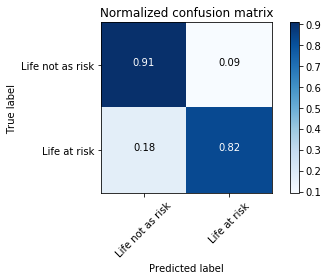

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score

rfClassifier = joblib.load('rfClassifier.joblib')

y_predictions = rfClassifier.predict(features)

print "F-score on validation data: {:.4f}".format(fbeta_score(labels, y_predictions, beta = 2))


cnf_matrix = confusion_matrix(labels, y_predictions)
tn, fp, fn, tp = confusion_matrix(labels, y_predictions).ravel()
print("tn: %f, fp: %f, fn:%f, tp: %f"%(tn, fp, fn, tp))
model_utils.plot_confusion_matrix(cnf_matrix, classes=['Life not as risk', 'Life at risk'], normalize = True)

## Validation for model trained with reduced dataset

F-score on validation data: 0.7840
tn: 49170.000000, fp: 7421.000000, fn:2179.000000, tp: 11712.000000


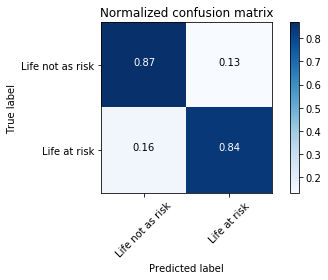

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score

rfClassifier_reduced = joblib.load('rfClassifier_reduced.joblib')

y_predictions_reduced = rfClassifier_reduced.predict(features)

print "F-score on validation data: {:.4f}".format(fbeta_score(labels, y_predictions_reduced, beta = 2))


cnf_matrix = confusion_matrix(labels, y_predictions_reduced)
tn, fp, fn, tp = confusion_matrix(labels, y_predictions_reduced).ravel()
print("tn: %f, fp: %f, fn:%f, tp: %f"%(tn, fp, fn, tp))
model_utils.plot_confusion_matrix(cnf_matrix, classes=['Life not as risk', 'Life at risk'], normalize = True)